In [1]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger -- this command turns the debugger OFF
%pdb off

from _447 import *

!pip install control
import control as ctrl

Automatic pdb calling has been turned OFF
  Using cached control-0.10.2-py3-none-any.whl.metadata (7.6 kB)
Using cached control-0.10.2-py3-none-any.whl (578 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Plant: 
$$P(s) = \cfrac{1}{s^2 + 10s + 20}$$

Text(0.5, 1.0, 'open loop plant P(s)')

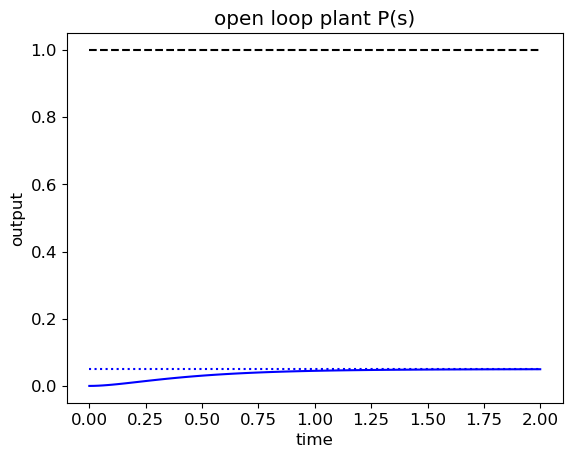

In [2]:
t = np.linspace(0,2,100)
P = ctrl.TransferFunction(1,[1, 10, 20]) 
t,y = ctrl.step_response(P,t) 

plt.plot(t,y,'b')
plt.plot(t,np.ones_like(t),'k--')
plt.plot(t,np.ones_like(t)*1/20,'b:')
plt.xlabel('time')
plt.ylabel('output')
plt.title('open loop plant P(s)')

Text(0.5, 1.0, 'proportional: C = Kp')

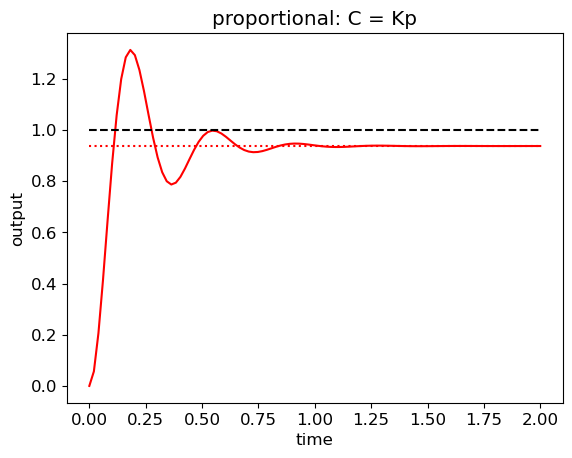

In [27]:
Kp = 300
C = Kp
sys_cl = ctrl.feedback(C * P)
t,y_p = ctrl.step_response(sys_cl,t) 

plt.plot(t,y_p,'r')
plt.plot(t,np.ones_like(t),'k--')
plt.plot(t,np.ones_like(t)*y_p[-1],'r:')
plt.xlabel('time')
plt.ylabel('output')
plt.title('proportional: C = Kp')

### We see that the proportional controller reduced both the rise time and the steady-state error, increased the overshoot, and decreased the settling time by a small amount.

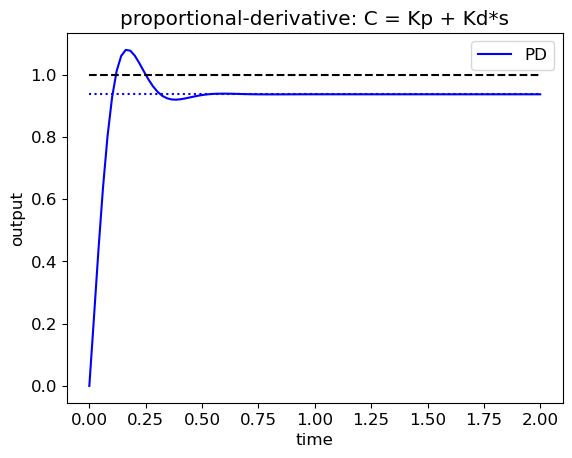

In [26]:
Kp = 300
Kd = 10

C = ctrl.TransferFunction([Kd,Kp],[1])
sys_cl = ctrl.feedback(C * P)
t,y_pd = ctrl.step_response(sys_cl,t) 

plt.plot(t,y_pd,'b',label='PD')
# plt.plot(t,y_p,'r',label='P')
plt.plot(t,np.ones_like(t),'k--')
plt.plot(t,np.ones_like(t)*y_pd[-1],'b:')
plt.xlabel('time')
plt.ylabel('output')
plt.title('proportional-derivative: C = Kp + Kd*s')
plt.legend()

### We see that the addition of the derivative term reduced both the overshoot and the settling time, and had a negligible effect on the rise time and the steady-state error.



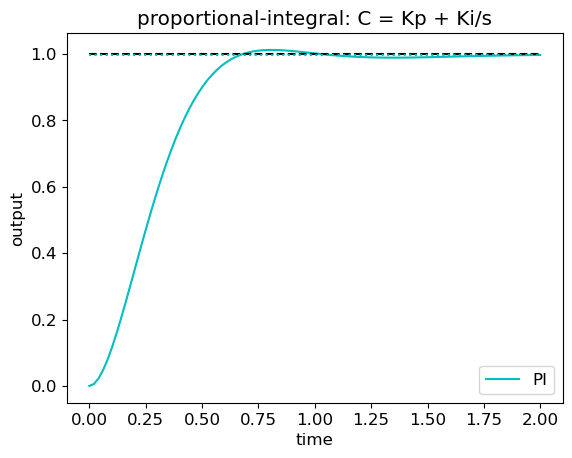

In [28]:
Kp = 30
Ki = 70
C = ctrl.TransferFunction([Kp,Ki],[1,0])
sys_cl = ctrl.feedback(C * P)
t,y_pi = ctrl.step_response(sys_cl,t) 

plt.plot(t,y_pi,'c',label='PI')
# plt.plot(t,y_p,'r',label='P')
plt.plot(t,np.ones_like(t),'k--')
plt.plot(t,np.ones_like(t)*y_pi[-1],'c:')
plt.xlabel('time')
plt.ylabel('output')
plt.title('proportional-integral: C = Kp + Ki/s')
plt.legend()

### We have reduced the proportional gain ($K_p$) because the integral controller also reduces the rise time and increases the overshoot as the proportional controller does (double effect). The above response shows that the integral controller eliminated the steady-state error in this case.

Text(0.5, 1.0, 'proportional-integral-derivative: C = Kp + Ki/s + Kd*s')

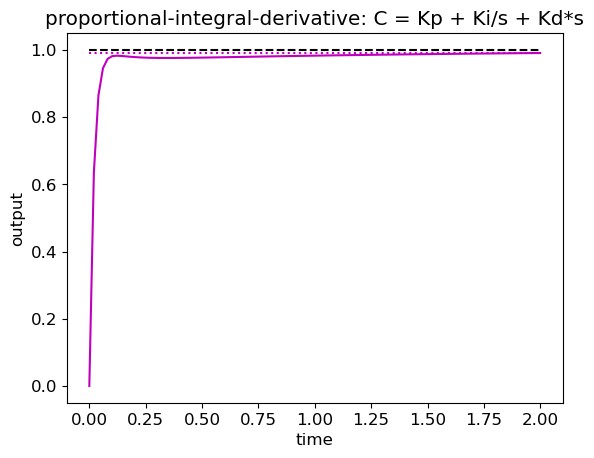

In [24]:
Kp = 500;
Ki = 300;
Kd = 50;
C = ctrl.TransferFunction([Kd,Kp,Ki],[1,0])
sys_cl = ctrl.feedback(C * P)
t,y_pid = ctrl.step_response(sys_cl,t) 

plt.plot(t,y_pid,'m',label='PID')
plt.plot(t,np.ones_like(t),'k--')
plt.plot(t,np.ones_like(t)*y_pid[-1],'m:')
plt.xlabel('time')
plt.ylabel('output')
plt.title('proportional-integral-derivative: C = Kp + Ki/s + Kd*s')

### Now, we have designed a closed-loop system with no overshoot, fast rise time, and no steady-state error.

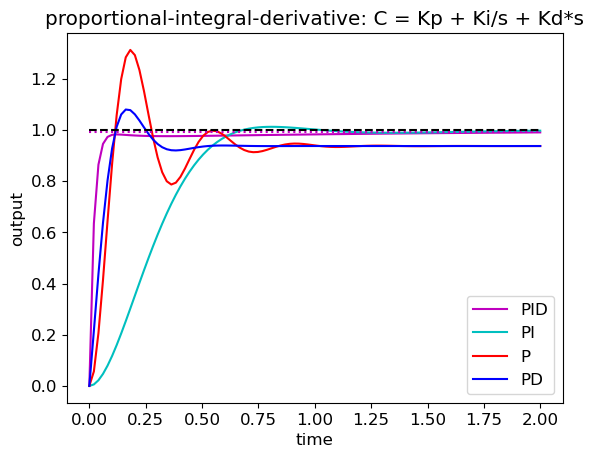

In [25]:
plt.plot(t,y_pid,'m',label='PID')
plt.plot(t,y_pi,'c',label='PI')
plt.plot(t,y_p,'r',label='P')
plt.plot(t,y_pd,'b',label='PD')
plt.plot(t,np.ones_like(t),'k--')
plt.plot(t,np.ones_like(t)*y_pid[-1],'m:')
plt.xlabel('time')
plt.ylabel('output')
plt.title('proportional-integral-derivative: C = Kp + Ki/s + Kd*s')
plt.legend()